## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `8_canopy_cover_aspect` 
### Calculate the percent canopy cover for each BAF by aspect 

Notebook contents 
* Calculate the percentage canopy cover on Cle Elum Ridge by aspect

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import geopandas as gpd

import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# Paths for local machine
# ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_simple.nc') 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds

<xarray.Dataset>
Dimensions:             (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                   (x) float64 4.65e+05 4.65e+05 ... 4.676e+05 4.676e+05
  * y                   (y) float64 2.111e+05 2.111e+05 ... 2.097e+05 2.097e+05
  * band                (band) int32 1
    spatial_ref         int32 ...
Data variables: (12/30)
    chmws_rapid         (band, y, x) float32 ...
    dce_rapid           (band, y, x) float32 ...
    giulia_dce_rapid    (band, y, x) float32 ...
    giulia_dce_ncalm    (band, y, x) float32 ...
    baf_old             (band, y, x) float32 ...
    baf_new             (band, y, x) float32 ...
    ...                  ...
    hs_ncalm            (band, y, x) float32 ...
    dem                 (band, y, x) float32 ...
    hs_rapid            (band, y, x) float32 ...
    chmas_rapid         (band, y, x) float32 ...
    dtm_rapid           (band, y, x) float32 ...
    dsm_rapid           (band, y, x) float32 ...

Define Constants

In [13]:
# because we are loading the simple dataset to save on memory, we need to calculate a few things...
# create binary object for dah
ds['dah_binary'] = np.nan
ds['dah_binary'] = ds['dah_binary'].where(~(ds['dah'] >= 0),  1)  # where DAH is greater than 0, then 1 for high heat index
ds['dah_binary'] = ds['dah_binary'].where(~(ds['dah'] <  0), -1)  # where DAH is less than or equal to 0, then -1 for low heat index

# and, make the baf_ridge binary 
ds['baf_ridge'] = ds['baf_ridge'].where(~(ds['baf_ridge'] >= 0),  1) # where not false (true) fill with 1 (south)
ds['baf_ridge'] = ds['baf_ridge'].where(~(ds['baf_ridge'] <  0), -1) # where not false (true) fill with -1 (north)

ds['baf'] = ds['baf_new'].copy(deep=True)

In [6]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

So, we want to calculate the percentage of canopy cover like before in notebook `7_canopy_cover`\
except now we want to break this up by aspect (side of the ridge)\
So I made a copy of notebook 7 to just edit the code for aspect and replot everything. 

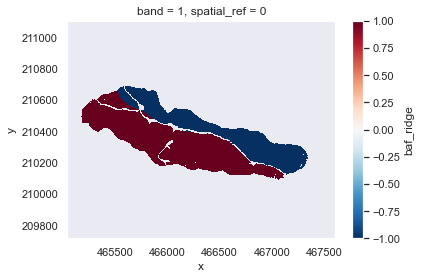

In [7]:
ds['baf_ridge'].plot()

### Calculate % Canopy Cover On Each Side of the Ridge

In [16]:
# create two versions of the dataframe, one for the north and one for the south
ds_north = ds.where(ds['baf_ridge'] == -1, drop=True)
ds_south = ds.where(ds['baf_ridge'] ==  1, drop=True)

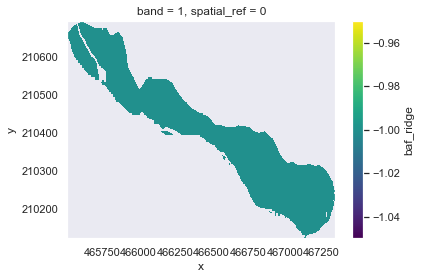

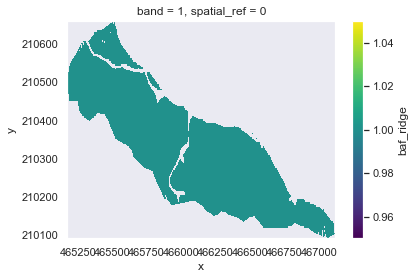

In [17]:
ds_north['baf_ridge'].plot()
plt.show()
ds_south['baf_ridge'].plot()
plt.show()

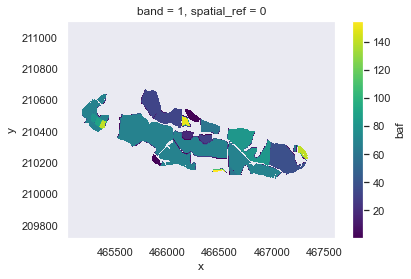

In [18]:
ds['baf'].plot()

In [19]:
# Initialize the DataFrame
df_north = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_north['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_north.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds_north['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds_north['baf'].where(ds_north['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_north.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_north)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              73              64              54
1     2     -2147483648     -2147483648     -2147483648
2    17              13               9               5
3    30     -2147483648     -2147483648     -2147483648
4    32              59              53              49
5    38              45              42              39
6    60              53              49              46
7    69               0               0               0
8    80     -2147483648     -2147483648     -2147483648
9    82              65              62              58
10   90     -2147483648     -2147483648     -2147483648
11  140              64              61              57
12  150              99              99              98
13  155     -2147483648     -2147483648     -2147483648


In [20]:
df_north = df_north.astype(int)
df_north.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [22]:
# drop any values < 0, and make nan 
df_north = df_north.where(df_north >= 0)
df_north.head()

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,1,73.0,64.0,54.0
1,2,NaN,NaN,NaN
2,17,13.0,9.0,5.0
3,30,NaN,NaN,NaN
4,32,59.0,53.0,49.0


Text(0.5, 1.0, 'threshold for 2m')

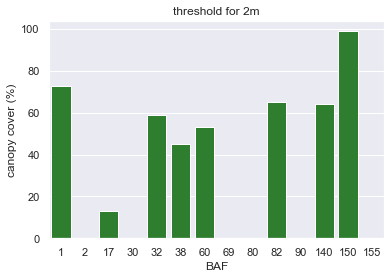

In [23]:
# Now, plot these to compare. 
sns.barplot(data=df_north, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [24]:
# create a version of this dataframe, df2_north, which uses a variable hue to show the different canopy cover values
df2_north = pd.melt(df_north, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')
df2_north.head()

,BAF,threshold,canopy_cover
0,1,canopy_cover_2m,73.0
1,2,canopy_cover_2m,NaN
2,17,canopy_cover_2m,13.0
3,30,canopy_cover_2m,NaN
4,32,canopy_cover_2m,59.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

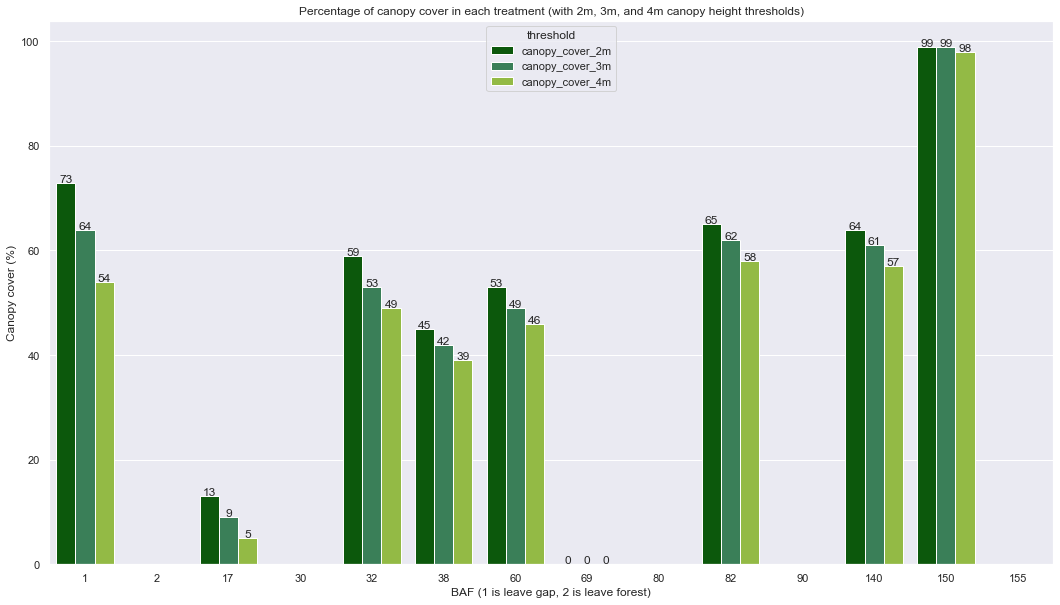

In [25]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_north, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

Now, fix the gap and forest 1 and 2 to read correctly and in the correct locations 

In [26]:
# change the value of df_north['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df_north['BAF'] = df_north['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df_north = df_north.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df_north.head()

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,leave gap,73.0,64.0,54.0
2,BAF 17,13.0,9.0,5.0
3,BAF 30,NaN,NaN,NaN
4,BAF 32,59.0,53.0,49.0
5,BAF 38,45.0,42.0,39.0


Text(0.5, 0, 'treatment units')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


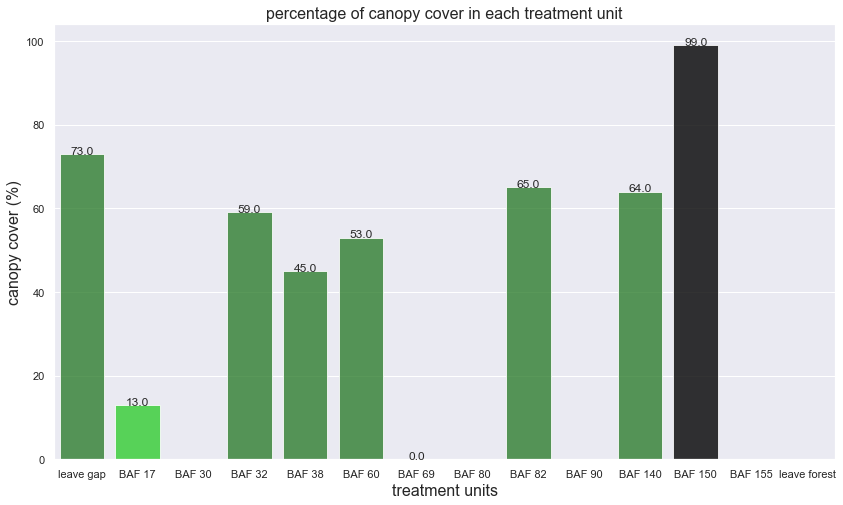

In [27]:
# Now, plot these to compare. 
fig = plt.figure(figsize=(14, 8))

ax = sns.barplot(data=df_north, x='BAF', y='canopy_cover_2m', color='forestgreen', alpha=0.8)

# add the number to the top of the bars
for index, value in enumerate(df_north['canopy_cover_2m']):
    plt.text(index, value, str(value), ha='center')

# Change the colors of the 2nd and 3rd bars
ax.patches[1].set_facecolor('limegreen')
ax.patches[2].set_facecolor('limegreen')

ax.patches[11].set_facecolor('black')
ax.patches[12].set_facecolor('black')
ax.patches[13].set_facecolor('black')

plt.title('percentage of canopy cover in each treatment unit', fontsize=16)
# plt.ylabel('canopy cover (%)\n2m canopy height threshold', fontsize=16)
plt.ylabel('canopy cover (%)', fontsize=16)

plt.xlabel('treatment units', fontsize=16)

### Now, calculate % canopy cover before the treatments 

In [75]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [77]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

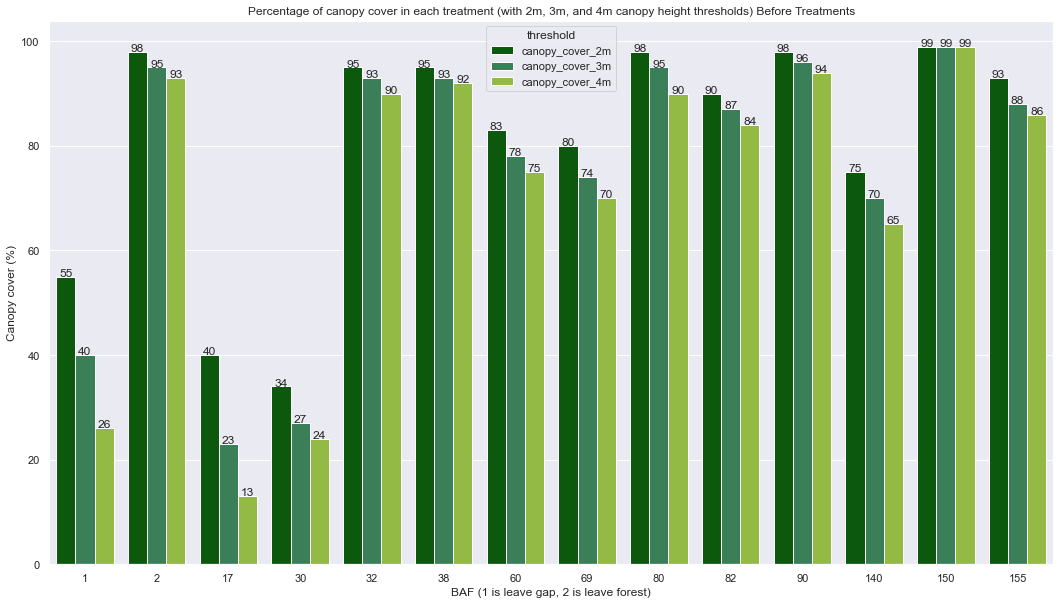

In [78]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

In [79]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [80]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'WY2021 before treatments'
df2_pos['treatment'] = 'WY2023 after treatments'

df2_all = pd.concat([df2_pre, df2_pos])

# drop the threshold column
df2_all = df2_all.drop(columns=['threshold'])
df2_all.reset_index(drop=True, inplace=True)
df2_all_fix = df2_all.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 15])


df2_all_fix['BAF'] = df2_all_fix['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155',
                                       1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

df2_all_fix.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_34460\4229083290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'WY2023 after treatments'


,BAF,canopy_cover,treatment
0,leave gap,55,WY2021 before treatments
2,BAF 17,40,WY2021 before treatments
3,BAF 30,34,WY2021 before treatments
4,BAF 32,95,WY2021 before treatments
5,BAF 38,95,WY2021 before treatments


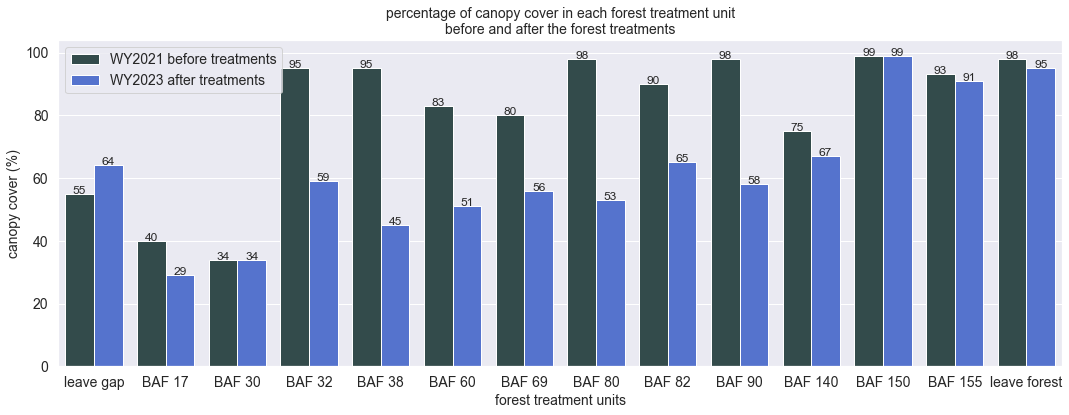

In [81]:
fig = plt.figure(figsize=(18, 6))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

plt.show()

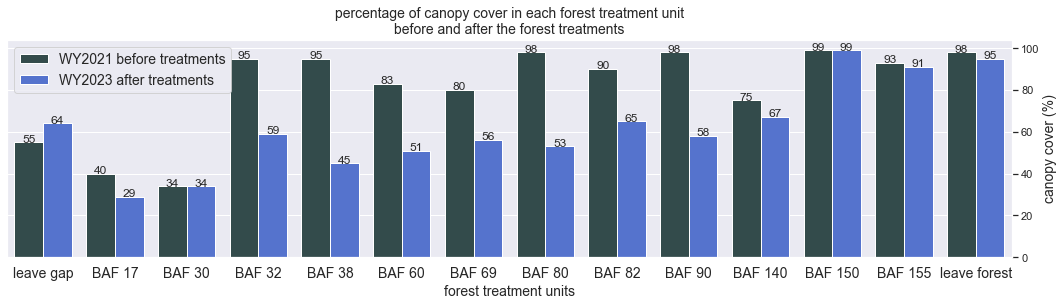

In [82]:
fig = plt.figure(figsize=(18, 4))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.show()